In [7]:
import numpy as np

##question no 3.1

by analytic solution we get minimizer of function as (4,16)

##question no 3.2

since it is a bi-quadratic function so close form like lab1 finding is not possible  

whatever we done in lab1 that for quadratic function  here we can not get same form since it is biquadratic 

in lab 1 we have done $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$ for this function

also above problem is non-convex optimisation problem so it is difficult to get close form if we try to find close form  then  $\min_{\alpha \geq 0} f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ is not easy

when we take derivative of $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ with respect to $\alpha$ it become cubic equation in term of $\alpha$ and coefficient of function is very large it can not be handle by python that makes it difficult 
somehow if we can get roots of derivative of $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))$ with respect to alpha after that also it is very difficult to handle a massy number so,closed form for above problem is very difficult

we can find close form expression for exact line search  but it is too dificult to solve since coefficent is to massy also we cannot generalize it for another function since we can not not able to get in matrix form as we get in lab1
i have found close form for above problem but comment out that code since it is difficult to handle.it's value is too massy more than 128 bit so numpy not able handle such a large number 

the given function is  Rosenbrock function, which is non convex function  introduced by Howard H. Rosenbrock in 1960. It is also known as Rosenbrock's valley or Rosenbrock's banana function. The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. To converge to the global minimum, however, is difficult

let's try to solve

##Question no 3.5

In [8]:
def evalf(x):
    r=0
    r=np.float64(x)
    r=512*((x[1]-(x[0]**2))**2) + (4-x[0])**2
    return r


In [9]:
def evalg(x):
  p=2048*(x[0]**3)-2048*x[0]*x[1] + 2*x[0] -8
  q=-1024*(x[0]**2) + 1024*x[1]
  s=np.array([p,q],dtype='float64')
  return s

In [10]:
"""def compute_steplength_exact(x):
  y_1,y_2,a_1,a_2,a_3,a_4=[0 for i in range(6)]
  y_1,y_2,a_1,a_2,a_3,a_4= [np.longdouble(y_1),np.longdouble(y_2),np.longdouble(a_1),np.longdouble(a_2),np.longdouble(a_3),np.longdouble(a_4)]
  y_1=1024*(x[0]**2)-1024*(x[1])
  y_2=8-2*x[0]-2048*(x[0]**3)+2048*x[0]*x[1]
  a_1=(2048*(y_2**4))/(10**8)
  a_2=(1024*(y_2**2)*(y_1-2*x[0]*y_2) + 2048*(y_2**2)*(y_1-2*x[0]*y_2))/(10**8)
  a_2=-a_2
  a_3=(1024*(y_1-2*x[0]*y_2)*(y_1-2*x[0]*y_2)-2048*(y_2**2)*(x[1]-(x[0]**2)) + 2*(y_2**2))/(10**8)
  a_4=(1024*(y_1-2*x[0]*y_2)*(x[1]-(x[0]**2)) -2*y_2*(4-x[0]))/(10**8)
  root=np.roots([a_1,a_2,a_3,a_4])
  for i in root:
    if 3*a_1*(i**2) + 2*a_2*i +a_3 > 0:
      return i"""

'def compute_steplength_exact(x):\n  y_1,y_2,a_1,a_2,a_3,a_4=[0 for i in range(6)]\n  y_1,y_2,a_1,a_2,a_3,a_4= [np.longdouble(y_1),np.longdouble(y_2),np.longdouble(a_1),np.longdouble(a_2),np.longdouble(a_3),np.longdouble(a_4)]\n  y_1=1024*(x[0]**2)-1024*(x[1])\n  y_2=8-2*x[0]-2048*(x[0]**3)+2048*x[0]*x[1]\n  a_1=(2048*(y_2**4))/(10**8)\n  a_2=(1024*(y_2**2)*(y_1-2*x[0]*y_2) + 2048*(y_2**2)*(y_1-2*x[0]*y_2))/(10**8)\n  a_2=-a_2\n  a_3=(1024*(y_1-2*x[0]*y_2)*(y_1-2*x[0]*y_2)-2048*(y_2**2)*(x[1]-(x[0]**2)) + 2*(y_2**2))/(10**8)\n  a_4=(1024*(y_1-2*x[0]*y_2)*(x[1]-(x[0]**2)) -2*y_2*(4-x[0]))/(10**8)\n  root=np.roots([a_1,a_2,a_3,a_4])\n  for i in root:\n    if 3*a_1*(i**2) + 2*a_2*i +a_3 > 0:\n      return i'

In [11]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  p_k=-gradf
  #implement the backtracking line search
  #while evalf(np.subtract(x,alpha*gradf))>evalf(x)+gamma*alpha*np.matmul(gradf.transpose(),-gradf):
  while evalf(x+alpha*p_k)>evalf(x)+gamma*alpha*np.matmul(gradf.T,p_k):
    alpha=rho*alpha
  #print('final step length:',alpha)
  return alpha

In [12]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [13]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  x = start_x
  g_x = evalg(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = compute_steplength_exact(x) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k,evalf(x)


$\huge{it \ takes \ too \ much \ itearation  \ to \ solve \ more \ than \ 1  \ crore \ for \ each \\ \alpha \ value \  since \ in \ free \ version \ of \ colab\  notebook\ it \ not  \ give\\  permission \ to \ run \ programm \ for \ long \ time \ so \ i \ have \ run \ the \\ programm \ in \ 10 \  session  \ and \ stored\ the \ result \\ in \ list  \ also \ i \ didn't \ able  \ to  \ run  \ for \ all  \ alpha  \ value \\  given \  so  \ i \ have \  run  \ for \   some  \ of \ them \ since \ it \ takes \ too \ much \  time  \ also \ on \ ieor \ server \ is \ not \ working \ properly \ from \ yesterday \ so \ run \ for \ all \ value \ is \ not \ possible }$



for $\alpha $ value i have taken starting point as given 
since it is far away from true minimizer so it takes too much iteration
 
 as discussed to sir in class of IE614 sir said you can take point near to minimizer but not too close so for $\rho$ value i have taken starting point as [25,25] and run for some of $\rho$ and all result  is based on that value


In [14]:
my_start_x=np.array([100,100])
my_tol=1e-10
result=[]
alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
for i in alpha:
  minimizer,no,objective = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  print('minimizer is ',minimizer,'no of iteration is',no,'objective function value is ',objective)
  result.append([minimizer,no,objective])

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5


KeyboardInterrupt: ignored

In [15]:
result=[]
result.append([1,[ 4., 16.], 12809093, 1.5652374580840863e-19])
result.append([0.75,[ 4., 16.],25713570,1.4870987783468097e-19])
result.append([0.6,[ 4., 16.],20434763,1.6182103665794635e-19])
result.append([0.5,[ 4., 16.], 12797440, 1.5652374580840863e-19])
result.append([0.25,[ 4., 16.], 12894217, 1.5652374580840863e-19])

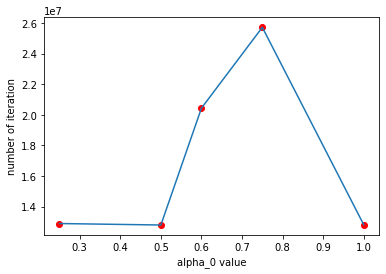

In [20]:
import matplotlib.pyplot as plt
plt.plot(result[0],result[2])
plt.scatter(result[0],result[2],color='r')
plt.xlabel('alpha_0 value')
plt.ylabel('number of iteration')
plt.show()

|index|alpha\_0|minimizer|number of iteration|objective function value|
|---|---|---|---|---|
|0|1|4,16|12809093|1\.5652374580840863e-19|
|1|0\.75|4,16|25713570|1\.4870987783468097e-19|
|2|0\.6|4,16|20434763|1\.6182103665794635e-19|
|3|0\.5|4,16|12797440|1\.5652374580840863e-19|
|4|0\.25|4,16|12894217|1\.5652374580840863e-19|

$\huge{observation}$

as we can see from graph and also from table that at $\alpha_0 =1.0 \  and \ \alpha_0 =0.5$ it takes less iteration compare to other value of $\alpha_0$

it increase from 1.0 to 0.75 after it decrease upto 0.5 again start increasing after 0.5 so from above it is clear that when $\alpha_0$ change number of iteration change and best possible value of $\alpha_0$ is 0.5 and 1.0

we can see from above table minimizer is approx same for each $\alpha_0$ value  also objective function value fluctuate but not so much it is approx same to true value which is zero

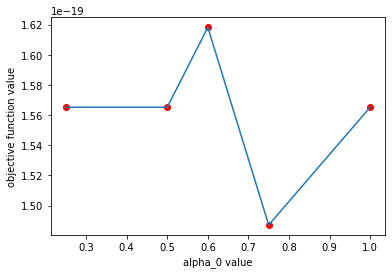

In [21]:
plt.plot(result[0],result[3])
plt.scatter(result[0],result[3],color='r')
plt.xlabel('alpha_0 value')
plt.ylabel('objective function value')
plt.show()

##Question no 3.6

In [22]:
my_start_x=np.array([25,25])
my_tol=1e-10
result=[]
rho=[0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
for i in rho:
  minimizer,no,objective = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  result.append([minimizer,no,objective])
  print('minimizer is ',minimizer,'no of iteration is',no,'objective function value is ',objective)

Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5


KeyboardInterrupt: ignored

In [23]:
resultrho=[]
resultrho.append([0.9,[4.,16.],5824304,9.773258168985567e-20])
resultrho.append([0.75,[4.,16.],8360258,1.5569312928772822e-19])
resultrho.append([0.6,[4.,16.],9499641,1.6155889777130032e-19])
resultrho.append([0.5,[ 4., 16.], 12809093, 1.5652374580840863e-19])

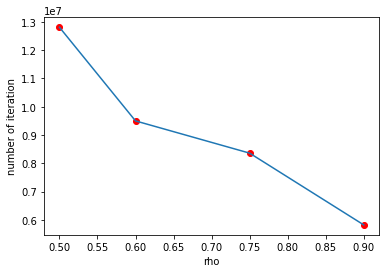

In [26]:
import matplotlib.pyplot as plt
plt.plot(result[0],result[2])
plt.scatter(result[0],result[2],color='r')
plt.xlabel('rho')
plt.ylabel('number of iteration')
plt.show()

|index|rho|minimizer|number of iteration|objective function value|
|---|---|---|---|---|
|0|0\.9|4,16|5824304|9\.773258168985567e-20|
|1|0\.75|4,16|8360258|1\.5569312928772822e-19|
|2|0\.6|4,16|9499641|1\.6155889777130032e-19|
|3|0\.5|4,16|12809093|1\.5652374580840863e-19|

$\huge{observation}$

as we can see from above table as $\rho$ value decrease number of iteration increase  minimizer and objective function value is approx same for all $\rho$ value that means number of iteration depend on value of $\rho$ taken  
so we can say that best $\rho$ value is 0.9 in this case 
as you can see from above when we change $\rho$ value from 0.9 to 0.75 number of iteration increase 1.5 times similarly when we change $\rho$ value from 0.75 to 0.6 number of iteration increase and so on 


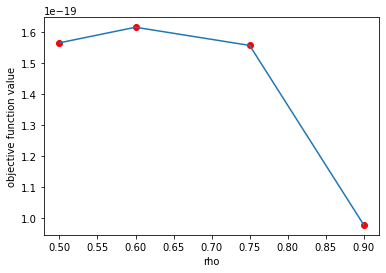

In [27]:
plt.plot(result[0],result[3])
plt.scatter(result[0],result[3],color='r')
plt.xlabel('rho')
plt.ylabel('objective function value')
plt.show()

## when we fixed step length as $10^5$

In [29]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  x = start_x
  g_x = evalg(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    #if line_search_type == EXACT_LINE_SEARCH:
      #step_length = compute_steplength_exact(x) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    if k==10**5:
      return x,k,evalf(x)


In [30]:
my_start_x=np.array([100,100])
my_tol=1e-10
result=[]
alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
for i in alpha:
  minimizer,no,objective = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, 0.5,0.5)
  print('minimizer is ',minimizer,'no of iteration is',no,'objective function value is ',objective)
  result.append([minimizer,no,objective])

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
minimizer is  [ 10.0304482  100.61051137] no of iteration is 100000 objective function value is  36.36650248172639
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
minimizer is  [ 10.03065709 100.61467845] no of iteration is 100000 objective function value is  36.36900728942846
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
minimizer is  [ 10.01608806 100.32254508] no of iteration is 100000 objective function value is  36.193456700419446
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
minimizer is  [ 9.90266637 98.06358915] no of iteration is 100000 objective function value is  34.841788132191994
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
minimizer is  [ 10.0304482  100.61051137] no of iteration is 100000 objective function value is  36.36650248172639
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
minimizer is  [ 10.02154873 10

|index|alpha\_0|minimizer|number of iteration|objective function value|
|---|---|---|---|---|
|0|1\.0|\[ 10\.0304482  100\.61051137\]|100000|36\.36650248172639|
|1|0\.9|\[ 10\.03065709 100\.61467845\]|100000|36\.36900728942846|
|2|0\.75|\[ 10\.01608806 100\.32254508\]|100000|36\.193456700419446|
|3|0\.6|\[ 9\.90266637 98\.06358915\]|100000|34\.841788132191994|
|4|0\.5|\[ 10\.0304482  100\.61051137\]|100000|36\.36650248172639|
|5|0\.4|\[ 10\.02154873 100\.43201666\]|100000|36\.25921998935971|
|6|0\.25|\[ 10\.0304482  100\.61051137\]|100000|36\.36650248172639|
|7|0\.1|\[ 10\.02154873 100\.43201666\]|100000|36\.25921998935971|
|8|0\.01|\[ 9\.64890796 93\.10198521\]|100000|31\.91032192985753|

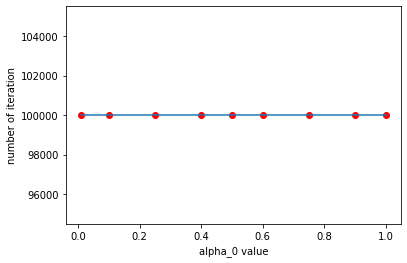

In [37]:
import matplotlib.pyplot as plt
plt.plot(alpha,result[1])
plt.scatter(alpha,result[1],color='r')
plt.xlabel('alpha_0 value')
plt.ylabel('number of iteration')
plt.show()

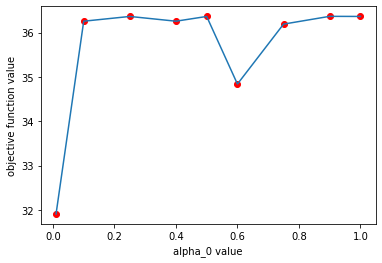

In [38]:
plt.plot(alpha,result[2])
plt.scatter(alpha,result[2],color='r')
plt.xlabel('alpha_0 value')
plt.ylabel('objective function value')
plt.show()

In [43]:
my_start_x=np.array([100,100])
my_tol=1e-10
result=[]
rho=[0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
for i in rho:
  minimizer,no,objective = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, i,0.5)
  result.append([minimizer,no,objective])
  print('minimizer is ',minimizer,'no of iteration is',no,'objective function value is ',objective)

Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
minimizer is  [ 9.93501183 98.7051623 ] no of iteration is 100000 objective function value is  35.224617898449345
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
minimizer is  [ 9.8305319  96.64004025] no of iteration is 100000 objective function value is  33.99534094507749
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
minimizer is  [ 10.0160292  100.32144746] no of iteration is 100000 objective function value is  36.19279568216172
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
minimizer is  [ 10.0304482  100.61051137] no of iteration is 100000 objective function value is  36.36650248172639
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
minimizer is  [ 10.00189465 100.03849003] no of iteration is 100000 objective function value is  36.0229197026215
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
minimizer is  [ 10.03108473 100.62325675] n

In [46]:
df

rho                                 minimizer number of iteration  \
0  0.90    [9.935011834020044, 98.70516229907885]              100000   
1  0.75     [9.83053190321386, 96.64004025458368]              100000   
2  0.60  [10.016029203941619, 100.32144745664749]              100000   
3  0.50  [10.030448203453682, 100.61051137380674]              100000   
4  0.40   [10.00189464969797, 100.03849003185054]              100000   
5  0.25  [10.031084731808233, 100.62325674524726]              100000   
6  0.10  [10.039811766357088, 100.79839215278533]              100000   
7  0.01  [10.014377423257018, 100.28830990128698]              100000   

  objective function value  
0                35.224618  
1                33.995341  
2                36.192796  
3                36.366502  
4                 36.02292  
5                36.374165  
6                36.479494  
7                36.172893

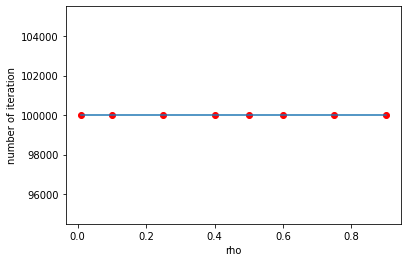

In [50]:
import matplotlib.pyplot as plt
plt.plot(rho,result[1])
plt.scatter(rho,result[1],color='r')
plt.xlabel('rho')
plt.ylabel('number of iteration')
plt.show()

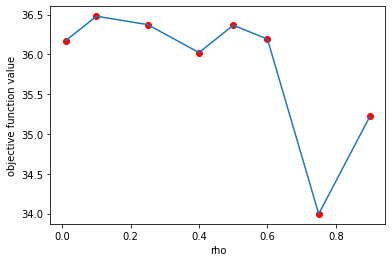

In [49]:
plt.plot(rho,result[2])
plt.scatter(rho,result[2],color='r')
plt.xlabel('rho')
plt.ylabel('objective function value')
plt.show()

we can not conclude anything from fixed length since it does even rich the near optimum solution